# Bayesian Logistic Regression Modules

This notebook tests the modules that perform logistic regression.

In [1]:
### Libraries

import datetime as dt
import matplotlib, matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import pymc

# Library settings.
% matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
### Custom Modules

import bayes_lr
import game_predictions

In [3]:
### Reloading Examples

bayes_lr = reload(bayes_lr)
game_predictions = reload(game_predictions)

In [4]:
### Settings

# Games path.
games_path = '../../../data/games_2015_tournament.csv'

# Pre-tournament statistics path.
stats_path = '../../../data/kenpom_summaries/summary15_pt.csv'

# Tournament bracket path.
bracket_path = '../../../data/tournament_brackets/2015_64.csv'
final_four_bracket_path = '../../../data/tournament_brackets/2015_4.csv'

## Data

In [5]:
# Read games.
games = pd.read_csv(games_path)
# Trim to single group.
games = games[games.game_group == 1].reset_index(drop=True)
# 2014 games.
# games_2014 = games[games.year == 2014].reset_index(drop=True)

In [6]:
# Read stats.
pre_tournament_stats = pd.read_csv(stats_path)

In [7]:
# Read brackets.
bracket = pd.read_csv(bracket_path, header=None).values
final_four_bracket = pd.read_csv(final_four_bracket_path, header=None).values

## Model

In [8]:
# Features.
features = ['location_Home','diff_Tempo','diff_OE','diff_DE','diff_Pythag']
model_mcmc = bayes_lr.model_games(data=games,features=features)

In [9]:
model_mcmc.sample(10000,2000)

 [-----------------100%-----------------] 10000 of 10000 complete in 18.8 sec

## Predict

In [10]:
y_hat_raw, y_hat, y_hat_accuracy = game_predictions.predict_games(games, features, model_mcmc=model_mcmc, method='pp')

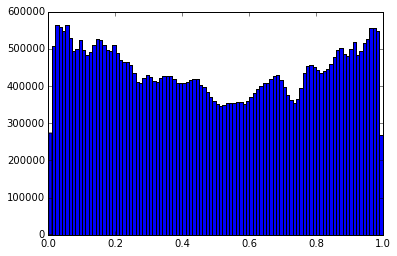

In [11]:
plt.hist(y_hat_raw.ravel(), bins=100);

## Simulate

In [12]:
# Some code to get random coefficients for testing.
coefs_all = bayes_lr.feature_coefficients(model_mcmc, features)
# print coefs_all.shape
c     = coefs_all[4000]
coefs = coefs_all[np.random.choice(len(coefs_all), size=10)]
# print coefs

In [13]:
# Output time information, simulate tournament.
print 'Start:',dt.datetime.now()
final_four_matchups, final_four_outcomes = game_predictions.simulate_tournament(final_four_bracket, pre_tournament_stats, features, model_mcmc=model_mcmc)
print 'End:  ',dt.datetime.now()

Start: 2015-05-02 13:50:25.124641
End:   2015-05-02 13:54:24.687185


In [14]:
final_four_matchups

,winner,loser,round_of,count
0,Duke,Kentucky,2,1811
1,Duke,Michigan St.,4,7387
2,Duke,Wisconsin,2,1860
3,Kentucky,Duke,2,1863
4,Kentucky,Michigan St.,2,309
5,Kentucky,Wisconsin,4,3985
6,Michigan St.,Duke,4,613
7,Michigan St.,Kentucky,2,2
8,Michigan St.,Wisconsin,2,2
9,Wisconsin,Duke,2,1853


In [15]:
final_four_outcomes

,wins_round_1,wins_round_2
Duke,7387,3671
Kentucky,3985,2172
Michigan St.,613,4
Wisconsin,4015,2153


In [16]:
# Output time information, simulate tournament.
print 'Start:',dt.datetime.now()
tournament_matchups, tournament_outcomes = game_predictions.simulate_tournament(bracket, pre_tournament_stats, features, model_mcmc=model_mcmc)
print 'End:  ',dt.datetime.now()

Start: 2015-05-02 13:54:24.735807
End:   2015-05-02 14:06:50.822270


In [17]:
print 'Matchup length:',len(tournament_matchups)
tournament_matchups.head()

Matchup length: 414


,winner,loser,round_of,count
0,Arizona,Baylor,16,5150
1,Arizona,Duke,2,132
2,Arizona,Gonzaga,2,241
3,Arizona,Iowa St.,2,37
4,Arizona,Kansas,4,2


In [18]:
tournament_outcomes

,wins_round_1,wins_round_2,wins_round_3,wins_round_4,wins_round_5,wins_round_6
Albany,0,0,0,0,0,0
Arizona,8000,7925,7113,3577,1830,955
Arkansas,8000,4054,0,0,0,0
Baylor,8000,6025,842,91,23,8
Belmont,0,0,0,0,0,0
Buffalo,3889,1836,0,0,0,0
Butler,3978,526,263,0,0,0
Cincinnati,3886,0,0,0,0,0
Coastal Carolina,0,0,0,0,0,0
Davidson,4029,0,0,0,0,0
